In [1]:
import cv2
import time
import numpy as np

In [2]:
capture = cv2.VideoCapture('test1.mp4')

In [7]:
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(capture.get(cv2.CAP_PROP_FPS))
print(f'width={width},height={height},frame count={count},fps={fps}')

width=960,height=540,frame count=27163,fps=30


### Euclidean distance

In [3]:
def euclidean_dist(A,B):
    return np.sqrt(np.sum((A - B)**2))

In [4]:
def manhattan_dist(A,B):
    return np.sum(abs(A - B))

In [6]:
manhattan_dist(np.array([2,3]),np.array([-1,5]))

5

In [9]:
capture = cv2.VideoCapture('full1.mp4')

ret,frame = capture.read()
unique = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
uheader = unique[0:80,40:940]
count = 1
fcount = 1

while capture.isOpened() and ret:
    ret1,frame1 = capture.read()
    
    if ret1:
        fcount += 1
        gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        gheader = gray[0:80,40:940]
        ed_orig = manhattan_dist(gray[80:452,10:952],unique[80:452,10:952])
        ed_header = manhattan_dist(gheader,uheader)
        
        if ed_orig>20000000 and ed_header>9000000:
            print(count,ed_orig,ed_header)
            name = str(count)+'_frame_'+str(fcount)+'.jpg'
            count += 1
            cv2.imwrite(name,unique)
            #print(pytesseract.image_to_string(uheader))
            #print()
            unique = gray
            uheader = unique[0:80,40:940]
            
    else:
        name = str(count)+'_frame_'+str(fcount)+'.jpg'
        count += 1
        cv2.imwrite(name,unique)
        #print(pytesseract.image_to_string(uheader))
        #count += 1
        #cv2.imwrite(name,unique)
        break
        
capture.release()

1 66045674 9277970
2 36041189 10536480
3 41612601 10502130
4 37052625 9660539
5 28270035 9422331


In [25]:
capture = cv2.VideoCapture('test1.mp4')

ret,frame = capture.read()
unique = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
uheader = unique[0:80,40:940]
count = 1
fcount = 1

while capture.isOpened() and ret:
    ret1,frame1 = capture.read()
    
    if ret1:
        fcount += 1
        gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        gheader = gray[0:80,40:940]
        ed_orig = euclidean_dist(gray[80:452,10:952],unique[80:452,10:952])
        ed_header = euclidean_dist(gheader,uheader)
        
        if ed_header>2500 or ed_orig>8900:
            print(count,ed_orig,ed_header)
            name = str(count)+'_frame_'+str(fcount)+'.jpg'
            count += 1
            #cv2.imwrite(name,unique)
            time.sleep(3)
            cv2.imshow('unique',unique)
            #print(pytesseract.image_to_string(uheader))
            #print()
            unique = gray
            uheader = unique[0:80,40:940]
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            
    else:
        name = str(count)+'_frame_'+str(fcount)+'.jpg'
        count += 1
        #cv2.imwrite(name,unique)
        time.sleep(2)
        cv2.imshow('unique',unique)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        #print(pytesseract.image_to_string(uheader))
        #count += 1
        #cv2.imwrite(name,unique)
        break
        
capture.release()
cv2.destroyAllWindows()

1 2256.3080463447363 2548.2845210062396
2 2330.6449751088217 2841.3982473423184
3 3970.1610798555766 2513.0955015677378
4 4620.153135990191 2671.7627140148506


### Histogram of Image

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

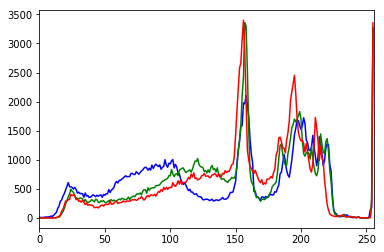

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Narayan.jpg')

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

### Edge detection

In [3]:
import cv2
import numpy as np

image = cv2.imread('Narayan.jpg',0)

height, width = image.shape

cv2.imshow('Original', image)
cv2.waitKey(5000)

cv2.destroyAllWindows()

In [4]:
# Sobel: Horizontal Edge detection

# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

cv2.imshow('Sobel X', sobel_x)
cv2.waitKey(5000)

cv2.destroyAllWindows()

In [5]:
# Sobel: Vertical Edge detection

sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(5000)

cv2.destroyAllWindows()

In [6]:
# Sobel: Combine both horizontal and vertical edge

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel_OR', sobel_OR)
cv2.waitKey(5000)

cv2.destroyAllWindows()

In [8]:
# Laplacian

laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [28]:
# Canny Edge Detection uses gradient values as thresholds

# we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.
image = cv2.imread('Narayan.jpg',0)

canny = cv2.Canny(image, 60, 120)
cv2.imshow('Canny', canny)
cv2.waitKey(5000)

cv2.destroyAllWindows()

### Display canny edge of slides

In [5]:
import cv2
import time

In [8]:
capture = cv2.VideoCapture('test1.mp4')
while capture.isOpened():
    
    ret1,frame1 = capture.read()
    
    if ret1 == True:
        
        gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        g1 = gray[0:80,0:960]
        time.sleep(1/fps)
        cv2.imshow('frame1',gray)
        
        canny = cv2.Canny(gray.copy(), 60, 120)
        cv2.imshow('Canny', canny)
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

### Every fps'th frame

In [10]:
import cv2
import time

In [ ]:
capture = cv2.VideoCapture('test3.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0
count = 0
while capture.isOpened():
    #num = int(round(capture.get(1)))
    ret1,frame1 = capture.read()
    #num = int(capture.get(cv2.CAP_PROP_POS_FRAMES))
    
    if ret1 == True: 
        
        if fnum%fps==0:
            count += 1
            print(count,fnum)

            gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
            #time.sleep(6)
            cv2.imshow('frame1',gray)

            canny = cv2.Canny(gray.copy(), 60, 120)
            cv2.imshow('Canny', canny)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
        fnum += 1
    
    else:
        break
        
capture.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [2]:
def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

In [3]:
capture = cv2.VideoCapture('test3.mp4')
fps = int(capture.get(cv2.CAP_PROP_FPS))
fnum = 0

ret,frame = capture.read()
unique = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
uheader = unique[0:80,40:940]
count = 1

if ret:
    fnum = 1
while capture.isOpened() and ret:
    ret1,frame1 = capture.read()
    
    if ret1:
        if fnum % fps == 0:
            gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
            gheader = gray[0:80,40:940]
            mse_orig = mse(gray[80:452,10:952],unique[80:452,10:952])
            mse_header = mse(gheader,uheader)

            if mse_orig>1350 and mse_header>750 or mse_orig>1000 and mse_header > 5000:
                print(mse_orig,mse_header)
                name = 'slide_'+str(count)+'.jpg'
                count += 1
                cv2.imwrite(name,unique)
                unique = gray
        fnum += 1
    else:
        count += 1
        cv2.imwrite(name,unique)
        break
        
capture.release()

4227.595347350638 1945.30875
4563.586840513207 2376.114361111111
5180.200705431135 2159.487347222222
4682.110132296874 2297.81
2448.313948245554 14291.506041666667
2890.8579692030225 2406.8068055555555
2983.879029404379 2371.1109305555556
1666.1973552039815 2156.0603472222224
2049.6009890875052 2277.5494722222224
1699.675062210351 14300.857791666667
3517.761169326302 2390.0815416666665
5112.071690295185 2428.7792777777777
5111.472596055065 2392.925277777778
5129.181480149761 2429.2257777777777
6904.045387872977 27765.035347222223
1083.4267658607857 27855.803305555557
5708.545553386754 25504.222125


### Edge Change ration

In [27]:
import sys
import cv2
import numpy as np
import datetime

# returns the edge-change-ratio
# The crop parameter can help you to reduce noises (e.g. subtitiles),
# the dilate_rate parameter controls the distance of the pixels between the frame
# and prev_frame


def ECR(frame, prev_frame, width, height, crop=False, dilate_rate = 3):
    safe_div = lambda x,y: 0 if y == 0 else x / y
    if crop:
        startY = int(height * 0.3)
        endY = int(height * 0.8)
        startX = int(width * 0.3)
        endX = int(width * 0.8)
        frame = frame[startY:endY, startX:endX]
        prev_frame = prev_frame[startY:endY, startX:endX]

    # Convert the frame into grayscale (Current frame)
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #Perform Canny Edge Detection to detect the number of edges (Current frame)
    edge = cv2.Canny(gray_image, 0, 200)

    #Perform image dilation (Current frame)
    dilated = cv2.dilate(edge, np.ones((dilate_rate, dilate_rate)))

    #Frame image inversion (Current frame)
    inverted = (255 - dilated)

    # # Convert the frame into grayscale (Previous frame)
    gray_image2 = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    #Perform Canny Edge Detection to detect the number of edges 
    edge2 = cv2.Canny(gray_image2, 0, 200)

    #Perform image dilation 
    dilated2 = cv2.dilate(edge2, np.ones((dilate_rate, dilate_rate)))

    #Frame image inversion (
    inverted2 = (255 - dilated2)

    # Determine outgoing and incoming edge pixels
    log_and1 = (edge2 & inverted) #out
    log_and2 = (edge & inverted2) #in

    pixels_sum_new = np.sum(edge)
    pixels_sum_old = np.sum(edge2)
    out_pixels = np.sum(log_and1)
    in_pixels = np.sum(log_and2)

    return max(safe_div(float(in_pixels),float(pixels_sum_new)), safe_div(float(out_pixels),float(pixels_sum_old)))
  


path = 'test1.mp4'
video = cv2.VideoCapture(path)
width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = video.get(cv2.CAP_PROP_FPS)

count = 0
 
video.set(3, width)
video.set(4, height)
prev_frame = None
while True:
    ret, frame = video.read()
    if frame is None:
        break
    if prev_frame is not None:
        #print (ECR(frame, prev_frame, width, height))
        ecr = (ECR(frame, prev_frame, width, height))
        if ecr > 0.8:
            i = (int(video.get(cv2.CAP_PROP_POS_FRAMES)))
            t = (str(datetime.timedelta(seconds = ((i+1)/fps))))
            print("Frame number \t{}".format(i)+"\tat time \t"+t)
            count = count + 1           
        
    prev_frame = frame


print("Number of shots detected {}".format(count))
video.release()

# Testing with two images

Number of shots detected 0
